<a href="https://colab.research.google.com/github/hfsuluova/CE888/blob/main/Assignment2/v1/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from keras import layers
from keras.layers import Input, Dense, Dropout, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.models import Model
from keras.models import Sequential
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
from keras.callbacks import ModelCheckpoint
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import os
import glob
import cv2

In [5]:
train_path = '/content/drive/MyDrive/Assignment/Fire-vs-NoFire/Training'
test_path = '/content/drive/MyDrive/Assignment/Fire-vs-NoFire/Test'

In [6]:
train_datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(train_path, batch_size=32, class_mode='binary', subset='training')

validation_generator = train_datagen.flow_from_directory(train_path, batch_size=32, class_mode='binary', subset='validation')

Found 31501 images belonging to 2 classes.
Found 7874 images belonging to 2 classes.


In [5]:
print(train_generator.class_indices)
print(validation_generator.class_indices)

{'Fire': 0, 'No_Fire': 1}
{'Fire': 0, 'No_Fire': 1}


In [9]:
train_steps = train_generator.n // train_generator.batch_size
valid_steps = validation_generator.n // validation_generator.batch_size

In [7]:
train_generator.image_shape

(256, 256, 3)

In [8]:
train_image_names = glob.glob('/content/drive/MyDrive/Assignment/Fire-vs-NoFire/Training/*/*.jpg')
train_Fire_image_names = glob.glob('/content/drive/MyDrive/Assignment/Fire-vs-NoFire/Training/Fire/*.jpg')
train_noFire_image_names = glob.glob('/content/drive/MyDrive/Assignment/Fire-vs-NoFire/Training/No_Fire/*.jpg')

print("Total number of training images: ", len(train_image_names))
print("number of Fire images: ", len(train_Fire_image_names))
print("number of No Fire images: ", len(train_noFire_image_names))

Total number of training images:  39375
number of Fire images:  25018
number of No Fire images:  14357


In [9]:
test_image_names = glob.glob('/content/drive/MyDrive/Assignment/Fire-vs-NoFire/Test/*/*.jpg')
test_Fire_image_names = glob.glob('/content/drive/MyDrive/Assignment/Fire-vs-NoFire/Test/Fire/*.jpg')
test_noFire_image_names = glob.glob('/content/drive/MyDrive/Assignment/Fire-vs-NoFire/Test/No_Fire/*.jpg')

print("Total number of training images: ", len(test_image_names))
print("number of Fire images: ", len(test_Fire_image_names))
print("number of No Fire images: ", len(test_noFire_image_names))

Total number of training images:  8617
number of Fire images:  5137
number of No Fire images:  3480


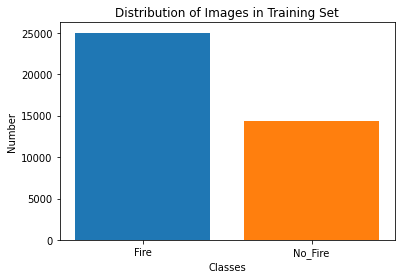

In [10]:
plt.bar(os.listdir('/content/drive/MyDrive/Assignment/Fire-vs-NoFire/Training')[0], len(train_Fire_image_names))
plt.bar(os.listdir('/content/drive/MyDrive/Assignment/Fire-vs-NoFire/Training')[1], len(train_noFire_image_names))
plt.xlabel("Classes")
plt.ylabel("Number")
plt.title("Distribution of Images in Training Set")
plt.show()

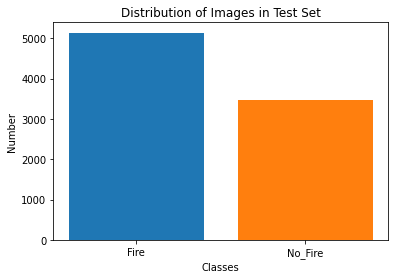

In [11]:
plt.bar(os.listdir('/content/drive/MyDrive/Assignment/Fire-vs-NoFire/Test')[0], len(test_Fire_image_names))
plt.bar(os.listdir('/content/drive/MyDrive/Assignment/Fire-vs-NoFire/Test')[1], len(test_noFire_image_names))
plt.xlabel("Classes")
plt.ylabel("Number")
plt.title("Distribution of Images in Test Set")
plt.show()

In [12]:
type(train_generator)

tensorflow.python.keras.preprocessing.image.DirectoryIterator

In [13]:
type(train_datagen)

tensorflow.python.keras.preprocessing.image.ImageDataGenerator

In [14]:
print("Batch Size for Input Image : ",train_generator[0][0].shape)
print("Batch Size for Output Image : ",train_generator[0][1].shape)
print("Image Size of first image : ",train_generator[0][0][0].shape)

Batch Size for Input Image :  (32, 256, 256, 3)
Batch Size for Output Image :  (32,)
Image Size of first image :  (256, 256, 3)


{'Fire': 0, 'No_Fire': 1}
{'Fire': 0, 'No_Fire': 1}


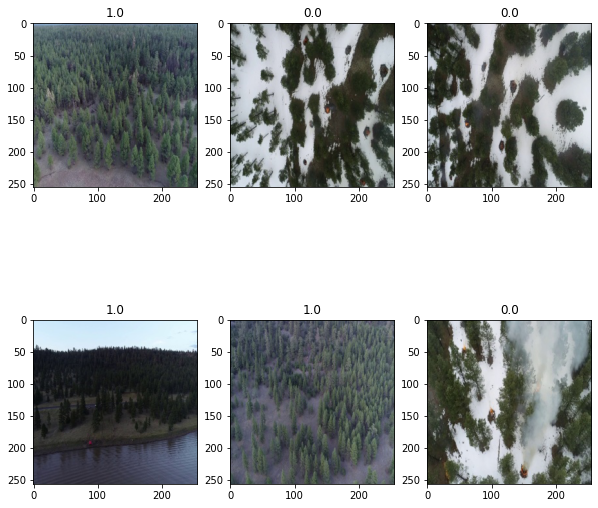

In [15]:
fig , axs = plt.subplots(2,3 ,figsize = (10,10))
axs[0][0].imshow(train_generator[0][0][12])
axs[0][0].set_title(train_generator[0][1][12])
axs[0][1].imshow(train_generator[0][0][1])
axs[0][1].set_title(train_generator[0][1][1])
axs[0][2].imshow(train_generator[0][0][14])
axs[0][2].set_title(train_generator[0][1][14])
axs[1][0].imshow(train_generator[0][0][17])
axs[1][0].set_title(train_generator[0][1][17])
axs[1][1].imshow(train_generator[0][0][19])
axs[1][1].set_title(train_generator[0][1][19])
axs[1][2].imshow(train_generator[0][0][3])
axs[1][2].set_title(train_generator[0][1][3])

#Title of 0.0 refers to Fire
#1.0 refers to NoFire
print(train_generator.class_indices)
print(validation_generator.class_indices)

In [16]:
checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/Assignment/weights.hdf5', verbose=1, save_best_only=True)

In [17]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.50))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 85, 85, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 85, 85, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 85, 85, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 42, 42, 64)        0

In [19]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

In [20]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=train_steps,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=valid_steps,
        verbose=1,
        callbacks=[checkpointer])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
984/984 [==============================] - 9309s 9s/step - loss: 0.2356 - binary_accuracy: 0.9203 - val_loss: 0.4881 - val_binary_accuracy: 0.9479

Epoch 00001: val_loss improved from inf to 0.48806, saving model to /content/drive/MyDrive/Assignment/weights.hdf5
Epoch 2/5
984/984 [==============================] - 157s 160ms/step - loss: 0.0224 - binary_accuracy: 0.9935 - val_loss: 0.7693 - val_binary_accuracy: 0.9215

Epoch 00002: val_loss did not improve from 0.48806
Epoch 3/5
984/984 [==============================] - 153s 156ms/step - loss: 0.0126 - binary_accuracy: 0.9963 - val_loss: 0.8636 - val_binary_accuracy: 0.9155

Epoch 00003: val_loss did not improve from 0.48806
Epoch 4/5
984/984 [==============================] - 152s 154ms/step - loss: 0.0096 - binary_accuracy: 0.9976 - val_loss: 1.1005 - val_binary_accuracy: 0.8180

Epoch 00004: val_loss did not improve from 0.48806
Epoch 5/5
984/984 [==============================] - 151s 153ms/step - loss: 0.0136 - binary_a

In [21]:
model.load_weights('/content/drive/MyDrive/Assignment/weights.hdf5')

In [22]:
checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/Assignment/weights.hdf5', verbose=1, save_best_only=True)

# Metrics(Accuracy) and plots(training/validation accuracy and loss)

In [7]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_path,
        batch_size=32,
        class_mode='binary')

test_steps = test_generator.n // test_generator.batch_size

Found 8617 images belonging to 2 classes.


In [32]:
model.evaluate_generator(test_generator, verbose=1, steps=test_steps)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


269/269 [==============================] - 1969s 7s/step - loss: 1.5073 - binary_accuracy: 0.5796


[1.5072754621505737, 0.5795771479606628]

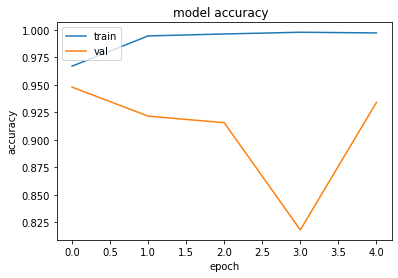

In [33]:
# summarize history for accuracy
plt.plot(history.history['binary_accuracy'] )
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy  ')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

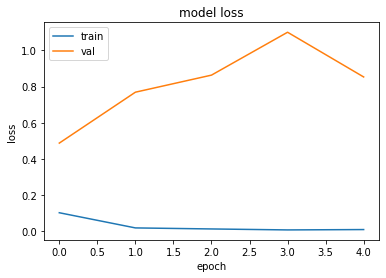

In [34]:
# summarize history for loss
plt.plot(history.history['loss'] )
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Predictions

In [35]:
preds = model.evaluate_generator(test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Loss = 1.5091568231582642
Test Accuracy = 0.579319953918457


# Classifier Using Transfer Learning

In [3]:
import os

import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import keras
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Conv2D, Flatten, Dropout, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.applications.inception_v3 import InceptionV3, preprocess_input

In [37]:
keras.backend.clear_session()

## Creating Inception Net bottleneck features for train and test sets

In [4]:
batch_size = 32

In [8]:
model2 = InceptionV3(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

In [9]:
bottleneck_features_train = model2.predict_generator(train_generator, verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


985/985 [==============================] - 193s 161ms/step


ResourceExhaustedError: ignored

In [ ]:
bottleneck_features_train.shape

In [ ]:
np.savez('inception_features_train', features=bottleneck_features_train)

In [ ]:
bottleneck_features_test = model2.predict_generator(test_generator, round(8617/batch_size), verbose=1)
np.savez('inception_features_test', features=bottleneck_features_test)

In [ ]:
train_data = np.load('inception_features_train.npz')['features']

In [ ]:
train_data.shape

In [ ]:
train_labels = np.array([0] * 7500 + [1] * 7500)

In [ ]:
train_labels.shape

In [ ]:


test_data = np.load('inception_features_test.npz')['features']
test_labels = np.array([0] * 322 + [1] * 322)



In [ ]:
classes = test_generator.class_indices
class_names = []
for key in classes.keys():
    class_names.append(key)
print(class_names)

## Defining and training the Model

In [ ]:
model2 = Sequential()

In [ ]:
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=train_data.shape[1:], padding='same'))
model2.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(3, 3)))
model2.add(Dropout(0.25))

model2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.50))

model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.6))
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))

In [ ]:
checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/Assignment/weights_inception.hdf5', verbose=1, save_best_only=True)

In [ ]:
keras.utils.print_summary(model2)

In [ ]:
#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['binary_accuracy'])

history2 = model2.fit(train_data, train_labels,
          epochs=5,
          batch_size=batch_size,
          validation_split=0.2,
          verbose=2,
          callbacks=[checkpointer], shuffle=True)

In [ ]:
model.load_weights('/content/drive/MyDrive/Assignment/weights_inception.hdf5')

In [ ]:
rounded_predictions = model.predict_classes(test_data, batch_size=32, verbose=1)

# New section

In [ ]:
model.evaluate(test_data,test_labels, verbose=1,batch_size=batch_size)

In [ ]:
#Confusion Matrix
matrix = confusion_matrix(test_labels, rounded_predictions)

dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt='g')
plt.title("Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show

In [ ]:
# summarize history for accuracy
plt.plot(history2.history['binary_accuracy'] )
plt.plot(history2.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# summarize history for loss
plt.plot(history2.history['loss'] )
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()